In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import func
import talib
import math

In [99]:
stock = pd.read_csv("/Users/shezihua/Downloads/DBF-2610/stock.csv.gz", compression='gzip', index_col=0)
future = pd.read_csv("/Users/shezihua/Downloads/DBF-2610/future.csv.gz", compression='gzip', index_col=0)
spread = pd.read_csv("/Users/shezihua/Downloads/DBF-2610/spread.csv.gz", compression='gzip', index_col=0, names=['spread'])
spread = spread.drop(index=[spread.index[0]])

In [100]:
future

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
2022-09-01 11:25:53.105,2022-09-01,112552468,2295,2290,2285,2280,2275,2270,2265,2260,...,24,61,43,2,42,39,54,10,DBFI2.cs,2272.5
2022-09-01 11:25:53.131,2022-09-01,112552468,2295,2290,2285,2280,2275,2270,2265,2260,...,24,61,43,2,42,39,54,10,DBFI2.cs,2272.5
2022-09-01 11:25:53.221,2022-09-01,112553218,2295,2290,2285,2280,2275,2270,2265,2260,...,20,61,43,2,42,39,54,10,DBFI2.cs,2272.5
2022-09-01 11:25:53.293,2022-09-01,112553218,2295,2290,2285,2280,2275,2270,2265,2260,...,20,61,43,2,42,39,54,10,DBFI2.cs,2272.5
2022-09-01 11:25:53.320,2022-09-01,112553218,2295,2290,2285,2280,2275,2270,2265,2260,...,20,61,43,2,42,39,54,10,DBFI2.cs,2272.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:57.547,2023-06-30,132457102,2650,2645,2640,2635,2630,2620,2615,2610,...,35,64,53,26,30,31,17,31,DBFG3.cs,2625.0
2023-06-30 13:24:57.690,2023-06-30,132457102,2650,2645,2640,2635,2630,2620,2615,2610,...,35,64,53,26,30,31,17,31,DBFG3.cs,2625.0
2023-06-30 13:24:58.187,2023-06-30,132457102,2650,2645,2640,2635,2630,2620,2615,2610,...,35,64,53,26,30,31,17,31,DBFG3.cs,2625.0
2023-06-30 13:24:58.842,2023-06-30,132457102,2650,2645,2640,2635,2630,2620,2615,2610,...,35,64,53,26,30,31,17,31,DBFG3.cs,2625.0


In [101]:
stock

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5,price
2022-09-01 11:25:53.105,2022-09-01,112553105,NaN,NaN,49863,2295.0,2290.0,2285.0,2280.0,2275.0,...,1588,1030,551,16,283,912,1561,2049,3887,2272.5
2022-09-01 11:25:53.131,2022-09-01,112553131,NaN,NaN,49863,2295.0,2290.0,2285.0,2280.0,2275.0,...,1588,1030,551,12,283,912,1561,2049,3887,2272.5
2022-09-01 11:25:53.221,2022-09-01,112553221,NaN,NaN,49863,2295.0,2290.0,2285.0,2280.0,2275.0,...,1588,1042,539,12,283,912,1561,2049,3887,2272.5
2022-09-01 11:25:53.293,2022-09-01,112553293,2275.0,12.0,49875,2300.0,2295.0,2290.0,2285.0,2280.0,...,1712,1588,1042,539,4,283,912,1561,2049,2277.5
2022-09-01 11:25:53.320,2022-09-01,112553320,NaN,NaN,49875,2300.0,2295.0,2290.0,2285.0,2280.0,...,1637,1588,1042,539,4,283,912,1561,1974,2277.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:57.547,2023-06-30,132457547,2625.0,1.0,57053,2650.0,2645.0,2640.0,2635.0,2630.0,...,357,1023,660,753,26,2378,1242,2376,1090,2627.5
2023-06-30 13:24:57.690,2023-06-30,132457690,NaN,NaN,57053,2650.0,2645.0,2640.0,2635.0,2630.0,...,357,1023,660,753,29,2378,1242,2376,1090,2627.5
2023-06-30 13:24:58.187,2023-06-30,132458187,NaN,NaN,57053,2650.0,2645.0,2640.0,2635.0,2630.0,...,357,1023,660,753,30,2378,1242,2376,1090,2627.5
2023-06-30 13:24:58.842,2023-06-30,132458842,NaN,NaN,57053,2650.0,2645.0,2640.0,2635.0,2630.0,...,357,1023,660,753,30,2378,1242,2376,1091,2627.5


In [102]:
spread

,spread
2022-09-01 11:25:53.105,0.000000
2022-09-01 11:25:53.131,0.000000
2022-09-01 11:25:53.221,0.000000
2022-09-01 11:25:53.293,0.002198
2022-09-01 11:25:53.320,0.002198
...,...
2023-06-30 13:24:57.547,0.000952
2023-06-30 13:24:57.690,0.000952
2023-06-30 13:24:58.187,0.000952
2023-06-30 13:24:58.842,0.000952


In [159]:
feature = pd.DataFrame()
feature = func.get_factor(feature, spread, future, stock)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [164]:
feature = feature.fillna(value=0)

In [166]:
corr_table = feature.corr()

In [173]:
corr_table = feature.corr()
corr_table.style.background_gradient(cmap='coolwarm')

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,Stock_Ask_Bid_Price_Depth_Ratio,stockprice,midQuote,Stock_Ask_Bid_Total_Volume_Ratio,stock_pressure,delta_pressure,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
spread,1.000000,0.998082,0.993199,0.986366,0.120821,0.114766,0.044626,0.112697,0.998785,0.995209,0.989889,-0.070549,-0.409696,-0.432006,-0.097363,0.234374,-0.001198,0.000916,-0.000931,-0.001198,0.001198,-0.005751,-0.000317,-0.016886,-0.010607,-0.002466,0.030371
MA_5,0.998082,1.000000,0.996010,0.988748,0.113823,0.118874,0.016582,0.102499,0.999852,0.997705,0.992318,-0.070631,-0.410299,-0.432550,-0.098362,0.234571,-0.000469,-0.000273,0.000277,-0.000469,0.000469,-0.005732,-0.000138,-0.017643,-0.011856,-0.003273,-0.014170
MA_20,0.993199,0.996010,1.000000,0.994414,0.041465,0.070267,-0.057790,0.075192,0.996298,0.999606,0.997031,-0.070858,-0.411584,-0.433689,-0.100354,0.234801,-0.000143,-0.000304,0.000306,-0.000143,0.000143,-0.005545,-0.000020,-0.013146,-0.013385,-0.005519,-0.013875
MA_60,0.986366,0.988748,0.994414,1.000000,-0.030632,-0.021728,-0.028759,0.036100,0.989170,0.994910,0.999287,-0.071256,-0.413581,-0.435479,-0.102945,0.235564,-0.000061,-0.000141,0.000142,-0.000061,0.000061,-0.005388,0.000040,-0.005972,-0.007535,-0.007317,-0.009169
MACD,0.120821,0.113823,0.041465,-0.030632,1.000000,0.924402,0.429694,0.426871,0.110937,0.053364,-0.005965,0.000565,0.001533,-0.001742,0.024932,0.004850,-0.002801,-0.000050,0.000066,-0.002801,0.002801,-0.002546,-0.001366,-0.072148,-0.017358,0.028360,-0.002160
MACDsignal,0.114766,0.118874,0.070267,-0.021728,0.924402,1.000000,0.052797,0.405890,0.115583,0.073258,0.007064,0.000685,0.001412,-0.001698,0.022531,0.003186,-0.001554,-0.001975,0.002012,-0.001554,0.001554,-0.002236,-0.000802,-0.074797,-0.037510,0.023340,-0.062549
MACDhist,0.044626,0.016582,-0.057790,-0.028759,0.429694,0.052797,1.000000,0.156697,0.016817,-0.033716,-0.032341,-0.000140,0.000669,-0.000542,0.011936,0.005157,-0.003654,0.004546,-0.004589,-0.003654,0.003654,-0.001374,-0.001677,-0.011818,0.043354,0.018996,0.142422
RSI,0.112697,0.102499,0.075192,0.036100,0.426871,0.405890,0.156697,1.000000,0.103080,0.078621,0.044113,0.026874,-0.016806,-0.019653,0.015791,0.104039,-0.002424,0.000929,-0.000932,-0.002424,0.002424,0.003268,0.000662,-0.152504,-0.134964,-0.114167,0.091756
EMA_5,0.998785,0.999852,0.996298,0.989170,0.110937,0.115583,0.016817,0.103080,1.000000,0.997914,0.992687,-0.070669,-0.410491,-0.432759,-0.098328,0.234708,-0.000467,-0.000077,0.000079,-0.000467,0.000467,-0.005723,-0.000173,-0.017138,-0.011727,-0.003239,-0.006543
EMA_20,0.995209,0.997705,0.999606,0.994910,0.053364,0.073258,-0.033716,0.078621,0.997914,1.000000,0.997413,-0.070936,-0.412018,-0.434172,-0.100222,0.235124,-0.000216,-0.000276,0.000279,-0.000216,0.000216,-0.005585,-0.000049,-0.013614,-0.012279,-0.005142,-0.012952


In [168]:
feature.index = pd.to_datetime(feature.index)

In [169]:
feature

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
2022-09-01 11:25:53.105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000
2022-09-01 11:25:53.131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000
2022-09-01 11:25:53.221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000
2022-09-01 11:25:53.293,0.002198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,-0.000002,0.000002,12.0,0.0,0.0,0.00,0.000000,0.002198
2022-09-01 11:25:53.320,0.002198,0.000879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000879,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,171.4,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:57.547,0.000952,0.000952,0.000238,0.000079,0.000235,0.000124,0.000111,99.887383,0.000827,0.000375,...,0.0,0.0,0.000000,0.000000,1.0,0.0,27.4,26.30,25.300000,0.000000
2023-06-30 13:24:57.690,0.000952,0.000952,0.000286,0.000095,0.000251,0.000149,0.000101,99.887383,0.000868,0.000430,...,0.0,0.0,0.000000,0.000000,0.0,0.0,27.6,27.00,25.533333,0.000000
2023-06-30 13:24:58.187,0.000952,0.000952,0.000333,0.000111,0.000260,0.000171,0.000088,99.887383,0.000896,0.000479,...,0.0,0.0,0.000000,0.000000,0.0,0.0,28.0,27.75,25.700000,0.000000
2023-06-30 13:24:58.842,0.000952,0.000952,0.000381,0.000127,0.000264,0.000190,0.000074,99.887383,0.000915,0.000524,...,0.0,0.0,0.000000,0.000000,0.0,0.0,28.4,28.50,25.866667,0.000000


In [171]:
factor_path = '/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/SummerIndependentProject/factor/'
feature.to_csv(factor_path + 'factor.csv.gz', compression='gzip', index=True)

In [175]:
futureCodeList = ['JBF', 'QWF', 'HCF', 'DBF', 'EHF', 'IPF', 'IIF', 'QXF', 'PEF', 'NAF']
stockCodeList = ['3443', '2388', '2498', '2610', '1319', '3035', '3006', '2615', '5425', '3105']
futureCode = futureCodeList[1]
stockCode = stockCodeList[1]
data_clean_path = '/Users/shezihua/Documents/MAFM/2022-2023 Summer/MAFS 6100L/SummerIndependentProject/dataCleaned/'

stock = pd.read_csv(data_clean_path + futureCode + "-" + stockCode + "/stock.csv.gz", compression='gzip', index_col=0)
future = pd.read_csv(data_clean_path + futureCode + "-" + stockCode + "/future.csv.gz", compression='gzip', index_col=0)
spread = pd.read_csv(data_clean_path + futureCode + "-" + stockCode + "/spread.csv.gz", compression='gzip', index_col=0, names=['spread'])
spread = spread.drop(index=[spread.index[0]])

In [176]:
stock

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5,price
2022-04-27 09:00:15.039,2022-04-27,90015039,4870.0,60.0,60,4935.0,4915.0,4900.0,4890.0,4880.0,...,1,4,2,1,3,1,11,4,24,4875.0
2022-04-27 09:00:15.133,2022-04-27,90015133,4890.0,1.0,63,4950.0,4940.0,4935.0,4930.0,4900.0,...,1,2,1,4,7,1,11,4,24,4885.0
2022-04-27 09:00:15.156,2022-04-27,90015156,4900.0,1.0,64,4950.0,4940.0,4935.0,4930.0,4900.0,...,1,2,1,3,7,1,11,4,24,4885.0
2022-04-27 09:00:15.165,2022-04-27,90015165,NaN,NaN,64,4960.0,4950.0,4940.0,4935.0,4900.0,...,1,1,2,3,1,7,1,11,4,4887.5
2022-04-27 09:00:15.179,2022-04-27,90015179,NaN,NaN,64,4960.0,4950.0,4940.0,4935.0,4900.0,...,1,1,2,3,5,7,1,11,4,4887.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:53.121,2023-06-30,132453121,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,63,45,4,7,1,4,29,40,92,8105.0
2023-06-30 13:24:57.470,2023-06-30,132457470,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,63,47,4,7,1,4,29,40,92,8105.0
2023-06-30 13:24:57.492,2023-06-30,132457492,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,63,47,4,7,2,4,29,40,92,8105.0
2023-06-30 13:24:58.928,2023-06-30,132458928,NaN,NaN,5581,8150.0,8140.0,8130.0,8120.0,8110.0,...,62,47,4,7,2,4,29,40,92,8105.0


In [177]:
future

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
2022-04-27 09:00:15.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:53.121,2023-06-30,132453103.0,8140.0,8130.0,8120.0,8110.0,8100.0,8070.0,8060.0,8050.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,QWFG3.cs,8085.0
2023-06-30 13:24:57.470,2023-06-30,132456477.0,8140.0,8130.0,8120.0,8110.0,8100.0,8070.0,8060.0,8050.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,QWFG3.cs,8085.0
2023-06-30 13:24:57.492,2023-06-30,132457477.0,8140.0,8130.0,8120.0,8110.0,8100.0,8070.0,8060.0,8050.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,QWFG3.cs,8085.0
2023-06-30 13:24:58.928,2023-06-30,132457477.0,8140.0,8130.0,8120.0,8110.0,8100.0,8070.0,8060.0,8050.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,QWFG3.cs,8085.0


In [179]:
spread = pd.read_csv(data_clean_path + futureCode + "-" + stockCode + "/spread.csv.gz", compression='gzip', index_col=0, names=['spread'])

In [232]:
spread = np.log(stock['price']) - np.log(future['midQ'])
spread = pd.DataFrame(spread)
spread.columns = ['spread']

In [233]:
spread

,spread
2022-04-27 09:00:15.039,NaN
2022-04-27 09:00:15.133,NaN
2022-04-27 09:00:15.156,NaN
2022-04-27 09:00:15.165,NaN
2022-04-27 09:00:15.179,NaN
...,...
2023-06-30 13:24:53.121,0.002471
2023-06-30 13:24:57.470,0.002471
2023-06-30 13:24:57.492,0.002471
2023-06-30 13:24:58.928,0.002471


In [239]:
def get_factor(df, spread, future, stock):
    df['spread'] = spread['spread']
    # calculate the moving average
    df['MA_5'] = talib.SMA(spread['spread'], timeperiod=5)
    df['MA_20'] = talib.SMA(spread['spread'], timeperiod=20)
    df['MA_60'] = talib.SMA(spread['spread'], timeperiod=60)

    # calculate the moving average convergence divergence
    df['MACD'], df['MACDsignal'], df['MACDhist'] = talib.MACD(spread['spread'], fastperiod=12, slowperiod=26, signalperiod=9)

    # calculate the relative strength index
    df['RSI'] = talib.RSI(spread['spread'], timeperiod=14)

    # calculate EMA
    df['EMA_5'] = talib.EMA(spread['spread'], timeperiod=5)
    df['EMA_20'] = talib.EMA(spread['spread'], timeperiod=20)
    df['EMA_60'] = talib.EMA(spread['spread'], timeperiod=60)

    df['Stock_Ask_Bid_Price_Depth_Ratio'] = np.log((stock['SP5']- stock['SP1'])/ (stock['BP1']- stock['BP5']))
    df['stockprice'] = np.log(stock[['SP1','BP1']].mean(axis=1))
    df['midQuote'] = np.log(future[['askPrice1','bidPrice1']].mean(axis=1))

    ask_vol = stock[['SV1','SV2','SV3','SV4','SV5']].sum(axis=1)
    bid_vol = stock[['BV1','BV2','BV3','BV4','BV5']].sum(axis=1)
    df['Stock_Ask_Bid_Total_Volume_Ratio'] = ask_vol / bid_vol

    df['stock_pressure'] = np.log(stock['SP1'] / stock['BP1'])
    df['delta_pressure'] = np.insert(np.diff(df['stock_pressure']), 0, 0)

    sum_future_ask_bid = future['askPrice1'] + future['bidPrice1']
    df['delta_future_askPrice1'] = np.insert(np.diff(np.log(future['askPrice1'] / sum_future_ask_bid)), 0, 0)
    df['delta_future_bidPrice1'] = np.insert(np.diff(np.log(future['bidPrice1'] / sum_future_ask_bid)), 0, 0)

    sum_stock_ask_bid = stock['SP1'] + stock['BP1']
    df['delta_stock_SP1'] = np.insert(np.diff(np.log(stock['SP1'] / sum_stock_ask_bid)), 0, 0)
    df['delta_stock_BP1'] = np.insert(np.diff(np.log(stock['BP1'] / sum_stock_ask_bid)), 0, 0)

    df['stock_trade_size'] = stock['size']
    df['delta_stock_trade_size'] = np.insert(np.diff(stock['size']), 0, 0)

    df['vol_5_tick'] = talib.SMA(stock['BV1'], timeperiod=5)
    df['vol_20_tick'] = talib.SMA(stock['BV1'], timeperiod=20)
    df['vol_60_tick'] = talib.SMA(stock['BV1'], timeperiod=60)

    df['delta_spread'] = np.insert(np.diff(df['spread']), 0, 0)
    return df



In [240]:
import func
feature = pd.DataFrame()
feature = get_factor(feature, spread, future, stock)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [241]:
feature

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
2022-04-27 09:00:15.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.000000,60.0,0.0,NaN,NaN,NaN,0.0
2022-04-27 09:00:15.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.002041,-0.002049,1.0,-59.0,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,1.0,0.0,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.000512,0.000515,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-27 09:00:15.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,NaN,4.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:53.121,0.002471,0.002471,0.002131,0.002376,0.000070,0.000004,0.000066,58.876161,0.002402,0.002210,...,0.0,0.0,0.000000,0.000000,NaN,NaN,1.0,5.60,5.750000,0.0
2023-06-30 13:24:57.470,0.002471,0.002471,0.002162,0.002376,0.000081,0.000019,0.000062,58.876161,0.002425,0.002235,...,0.0,0.0,0.000000,0.000000,NaN,NaN,1.0,5.30,5.633333,0.0
2023-06-30 13:24:57.492,0.002471,0.002471,0.002193,0.002376,0.000088,0.000033,0.000055,58.876161,0.002440,0.002257,...,0.0,0.0,0.000000,0.000000,NaN,NaN,1.2,5.05,5.533333,0.0
2023-06-30 13:24:58.928,0.002471,0.002471,0.002224,0.002376,0.000093,0.000045,0.000048,58.876161,0.002450,0.002277,...,0.0,0.0,0.000000,0.000000,NaN,NaN,1.4,4.80,5.450000,0.0


In [242]:
feature = feature.fillna(value=0)

In [243]:
corr_table = feature.corr()
corr_table.style.background_gradient(cmap='coolwarm')

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,Stock_Ask_Bid_Price_Depth_Ratio,stockprice,midQuote,Stock_Ask_Bid_Total_Volume_Ratio,stock_pressure,delta_pressure,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
spread,1.000000,0.998511,0.995041,0.990104,0.102243,0.096590,0.039095,0.072238,0.999063,0.996470,0.992578,-0.003825,-0.139875,-0.151216,0.008696,0.067265,-0.000038,0.005655,-0.005704,-0.000038,0.000037,0.003783,0.000032,-0.008144,-0.004904,-0.001509,0.027229
MA_5,0.998511,1.000000,0.997127,0.991913,0.096269,0.100274,0.014904,0.055158,0.999884,0.998344,0.994418,-0.003275,-0.140054,-0.151311,0.007173,0.067239,-0.000088,-0.003132,0.003189,-0.000088,0.000088,0.003747,-0.000200,-0.008613,-0.005634,-0.001911,-0.011987
MA_20,0.995041,0.997127,1.000000,0.996035,0.034812,0.058995,-0.048010,0.019276,0.997344,0.999717,0.997848,-0.002644,-0.140405,-0.151478,0.004232,0.066995,-0.000088,-0.003104,0.003155,-0.000088,0.000088,0.003077,-0.000223,-0.005558,-0.006352,-0.002902,-0.010945
MA_60,0.990104,0.991913,0.996035,1.000000,-0.026329,-0.018722,-0.024517,-0.007677,0.992225,0.996366,0.999505,-0.002350,-0.140908,-0.151719,0.000823,0.066899,-0.000029,-0.002301,0.002336,-0.000030,0.000029,0.002774,-0.000132,-0.002058,-0.002960,-0.003475,-0.007444
MACD,0.102243,0.096269,0.034812,-0.026329,1.000000,0.923385,0.432468,0.523028,0.093766,0.044981,-0.005772,-0.007904,0.001012,-0.002794,0.049665,0.005819,-0.000350,0.000289,-0.000210,-0.000349,0.000351,0.008870,-0.000165,-0.050151,-0.014299,0.013588,-0.004812
MACDsignal,0.096590,0.100274,0.058995,-0.018722,0.923385,1.000000,0.053213,0.418405,0.097397,0.061672,0.005146,-0.005004,0.000890,-0.002695,0.044097,0.005077,-0.000630,-0.014187,0.014433,-0.000628,0.000631,0.007372,-0.000482,-0.048618,-0.027595,0.010292,-0.062199
MACDhist,0.039095,0.014904,-0.048010,-0.024517,0.432468,0.053213,1.000000,0.377810,0.015150,-0.027846,-0.027102,-0.008806,0.000543,-0.000937,0.025620,0.003214,0.000569,0.034076,-0.034447,0.000567,-0.000570,0.005759,0.000703,-0.016265,0.027619,0.011174,0.133575
RSI,0.072238,0.055158,0.019276,-0.007677,0.523028,0.418405,0.377810,1.000000,0.056550,0.026103,0.001620,-0.001017,-0.000078,0.009466,0.049161,0.007176,-0.000015,0.003203,-0.003251,-0.000016,0.000015,0.000580,-0.000575,-0.056951,-0.018976,0.008526,0.176621
EMA_5,0.999063,0.999884,0.997344,0.992225,0.093766,0.097397,0.015150,0.056550,1.000000,0.998501,0.994691,-0.003347,-0.140100,-0.151369,0.007318,0.067264,-0.000077,-0.001647,0.001686,-0.000077,0.000077,0.003723,-0.000170,-0.008266,-0.005547,-0.001888,-0.005259
EMA_20,0.996470,0.998344,0.999717,0.996366,0.044981,0.061672,-0.027846,0.026103,0.998501,1.000000,0.998110,-0.002794,-0.140502,-0.151609,0.004683,0.067119,-0.000081,-0.002981,0.003032,-0.000081,0.000081,0.003259,-0.000185,-0.005998,-0.005722,-0.002712,-0.010422


In [244]:
feature

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
2022-04-27 09:00:15.039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,60.0,0.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.002041,-0.002049,1.0,-59.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,-0.000512,0.000515,0.0,0.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,4.6,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:53.121,0.002471,0.002471,0.002131,0.002376,0.000070,0.000004,0.000066,58.876161,0.002402,0.002210,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,5.60,5.750000,0.0
2023-06-30 13:24:57.470,0.002471,0.002471,0.002162,0.002376,0.000081,0.000019,0.000062,58.876161,0.002425,0.002235,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,5.30,5.633333,0.0
2023-06-30 13:24:57.492,0.002471,0.002471,0.002193,0.002376,0.000088,0.000033,0.000055,58.876161,0.002440,0.002257,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.2,5.05,5.533333,0.0
2023-06-30 13:24:58.928,0.002471,0.002471,0.002224,0.002376,0.000093,0.000045,0.000048,58.876161,0.002450,0.002277,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.4,4.80,5.450000,0.0


In [246]:
feature.index = pd.to_datetime(feature.index)

In [269]:
feature.index.date

array([datetime.date(2022, 4, 27), datetime.date(2022, 4, 27),
       datetime.date(2022, 4, 27), ..., datetime.date(2023, 6, 30),
       datetime.date(2023, 6, 30), datetime.date(2023, 6, 30)],
      dtype=object)

In [272]:
day_list = np.unique(feature.index.date)

In [320]:
day_list

array([datetime.date(2022, 4, 27), datetime.date(2022, 4, 28),
       datetime.date(2022, 4, 29), datetime.date(2022, 5, 4),
       datetime.date(2022, 5, 5), datetime.date(2022, 5, 6),
       datetime.date(2022, 5, 9), datetime.date(2022, 5, 10),
       datetime.date(2022, 5, 11), datetime.date(2022, 5, 12),
       datetime.date(2022, 5, 13), datetime.date(2022, 5, 16),
       datetime.date(2022, 5, 17), datetime.date(2022, 5, 18),
       datetime.date(2022, 5, 19), datetime.date(2022, 5, 20),
       datetime.date(2022, 5, 23), datetime.date(2022, 5, 24),
       datetime.date(2022, 5, 25), datetime.date(2022, 5, 26),
       datetime.date(2022, 5, 27), datetime.date(2022, 5, 30),
       datetime.date(2022, 5, 31), datetime.date(2022, 6, 6),
       datetime.date(2022, 6, 8), datetime.date(2022, 6, 9),
       datetime.date(2022, 6, 10), datetime.date(2022, 6, 13),
       datetime.date(2022, 6, 14), datetime.date(2022, 6, 15),
       datetime.date(2022, 6, 16), datetime.date(2022, 6, 17),

In [ ]:
for day in day_list: 
    

In [321]:
day_list[0]

datetime.date(2022, 4, 27)

In [280]:
feature[pd.to_datetime('2022-04-27 09:00:15.039', format = '%Y/%m/%d %H:%M:%S.%f')]

KeyError: Timestamp('2022-04-27 09:00:15.039000')

In [325]:
feature.index

DatetimeIndex(['2022-04-27 09:00:15.039000', '2022-04-27 09:00:15.133000',
               '2022-04-27 09:00:15.156000', '2022-04-27 09:00:15.165000',
               '2022-04-27 09:00:15.179000', '2022-04-27 09:00:15.189000',
               '2022-04-27 09:00:15.211000', '2022-04-27 09:00:15.245000',
               '2022-04-27 09:00:15.283000', '2022-04-27 09:00:15.972000',
               ...
               '2023-06-30 13:24:45.156000', '2023-06-30 13:24:50.108000',
               '2023-06-30 13:24:50.140000', '2023-06-30 13:24:51.281000',
               '2023-06-30 13:24:52.849000', '2023-06-30 13:24:53.121000',
               '2023-06-30 13:24:57.470000', '2023-06-30 13:24:57.492000',
               '2023-06-30 13:24:58.928000', '2023-06-30 13:24:59.506000'],
              dtype='datetime64[ns]', length=6268969, freq=None)

In [314]:
date_obj = pd.to_datetime('2022/04/28 18:33:00.123', format = '%Y/%m/%d %H:%M:%S.%f')

In [328]:
type(feature.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [329]:
type(day_list[0])

datetime.date

In [333]:
pd.to_datetime(str(day_list[0]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')

Timestamp('2022-04-27 13:30:00')

In [379]:
train_start_time = feature.index >= pd.to_datetime(str(day_list[0]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
train_end_time = feature.index < pd.to_datetime(str(day_list[0 + 2]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
train = feature[train_start_time & train_end_time]

In [380]:
train

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
2022-04-27 09:00:15.039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,60.0,0.0,0.0,0.00,0.000000,0.000000
2022-04-27 09:00:15.133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.002041,-0.002049,1.0,-59.0,0.0,0.00,0.000000,0.000000
2022-04-27 09:00:15.156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.00,0.000000,0.000000
2022-04-27 09:00:15.165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,-0.000512,0.000515,0.0,0.0,0.0,0.00,0.000000,0.000000
2022-04-27 09:00:15.179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,4.6,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29 13:24:55.945,0.002536,0.002536,0.002713,0.002713,-0.000103,-0.000088,-0.000015,38.476197,0.002538,0.002661,...,0.0,0.0,0.000000,0.000000,1.0,0.0,15.8,13.00,11.383333,0.000000
2022-04-29 13:24:57.549,0.002029,0.002435,0.002637,0.002696,-0.000140,-0.000099,-0.000042,22.126358,0.002368,0.002601,...,0.0,0.0,-0.000506,0.000507,0.0,0.0,15.6,13.65,11.616667,-0.000507
2022-04-29 13:24:57.719,0.002029,0.002333,0.002561,0.002688,-0.000168,-0.000112,-0.000055,22.126358,0.002255,0.002546,...,0.0,0.0,0.000000,0.000000,0.0,0.0,15.4,14.30,11.766667,0.000000
2022-04-29 13:24:58.692,0.002029,0.002232,0.002511,0.002688,-0.000187,-0.000127,-0.000060,22.126358,0.002180,0.002497,...,0.0,0.0,0.000000,0.000000,0.0,0.0,15.4,15.00,11.933333,0.000000


In [381]:
test_start_time = feature.index >= pd.to_datetime(str(day_list[0 + 3]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
test_end_time = feature.index < pd.to_datetime(str(day_list[0 + 3]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
test = feature[test_start_time & test_end_time]

In [382]:
test 

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
2022-05-04 09:42:19.616,0.001005,0.001926,0.002384,0.002671,-0.000259,-0.000159,-0.000100,23.079012,0.001867,0.002358,...,-0.003584,0.003634,-0.000009,0.000009,0.0,0.0,14.0,16.10,12.133333,-0.001532
2022-05-04 09:42:19.642,0.001005,0.001721,0.002307,0.002645,-0.000333,-0.000194,-0.000140,23.079012,0.001580,0.002229,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.6,15.65,12.150000,0.000000
2022-05-04 09:42:19.657,0.001005,0.001516,0.002230,0.002620,-0.000388,-0.000233,-0.000155,23.079012,0.001388,0.002113,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.6,15.10,12.116667,0.000000
2022-05-04 09:42:19.688,0.001507,0.001411,0.002179,0.002603,-0.000386,-0.000263,-0.000123,36.811447,0.001428,0.002055,...,0.000503,-0.000508,0.000000,0.000000,0.0,0.0,9.2,14.65,12.133333,0.000503
2022-05-04 09:42:19.728,0.001507,0.001206,0.002127,0.002586,-0.000381,-0.000287,-0.000094,36.811447,0.001454,0.002003,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.4,13.85,11.950000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04 13:21:50.378,0.004506,0.004506,0.004506,0.004064,0.000057,0.000082,-0.000024,97.403121,0.004506,0.004483,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.4,14.50,14.216667,0.000000
2022-05-04 13:21:57.478,0.004506,0.004506,0.004506,0.004089,0.000053,0.000076,-0.000023,97.403121,0.004506,0.004485,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.6,13.90,14.183333,0.000000
2022-05-04 13:22:03.492,0.004506,0.004506,0.004506,0.004114,0.000049,0.000071,-0.000021,97.403121,0.004506,0.004487,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.6,13.45,14.216667,0.000000
2022-05-04 13:22:04.724,0.004506,0.004506,0.004506,0.004139,0.000046,0.000066,-0.000020,97.403121,0.004506,0.004489,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.6,13.00,14.250000,0.000000


In [471]:
day_list

array([datetime.date(2022, 4, 27), datetime.date(2022, 4, 28),
       datetime.date(2022, 4, 29), datetime.date(2022, 5, 4),
       datetime.date(2022, 5, 5), datetime.date(2022, 5, 6),
       datetime.date(2022, 5, 9), datetime.date(2022, 5, 10),
       datetime.date(2022, 5, 11), datetime.date(2022, 5, 12),
       datetime.date(2022, 5, 13), datetime.date(2022, 5, 16),
       datetime.date(2022, 5, 17), datetime.date(2022, 5, 18),
       datetime.date(2022, 5, 19), datetime.date(2022, 5, 20),
       datetime.date(2022, 5, 23), datetime.date(2022, 5, 24),
       datetime.date(2022, 5, 25), datetime.date(2022, 5, 26),
       datetime.date(2022, 5, 27), datetime.date(2022, 5, 30),
       datetime.date(2022, 5, 31), datetime.date(2022, 6, 6),
       datetime.date(2022, 6, 8), datetime.date(2022, 6, 9),
       datetime.date(2022, 6, 10), datetime.date(2022, 6, 13),
       datetime.date(2022, 6, 14), datetime.date(2022, 6, 15),
       datetime.date(2022, 6, 16), datetime.date(2022, 6, 17),

In [388]:
X_train = train[train.columns[0:-1]]
X_test = test[test.columns[0:-1]]
y_train = train['delta_spread']
y_test = test['delta_spread']


In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [390]:
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)

y_train_pred = model_ols.predict(X_train)
y_test_pred = model_ols.predict(X_test)

r2_in = model_ols.score(X_train, y_train)
r2_out = model_ols.score(X_test, y_test)
rmse_in = np.sqrt(np.mean((model_ols.predict(X_train) - y_train) ** 2))
rmse_out = np.sqrt(np.mean((model_ols.predict(X_test) - y_test) ** 2))

In [476]:
all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []
all_hit_ratio_in = []
all_hit_ratio_out = []

train_period = 10

for i in range(len(day_list) - train_period):
    train_start_time = feature.index >= pd.to_datetime(str(day_list[i]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    train_end_time = feature.index < pd.to_datetime(str(day_list[i + train_period - 1]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    train = feature[train_start_time & train_end_time]
    test_start_time = feature.index >= pd.to_datetime(str(day_list[i + train_period]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    test_end_time = feature.index < pd.to_datetime(str(day_list[i + train_period]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    test = feature[test_start_time & test_end_time]

    X_train = train[train.columns[0:-1]]
    X_test = test[test.columns[0:-1]]
    y_train = train['delta_spread']
    y_test = test['delta_spread']

    model_ols = LinearRegression()
    model_ols.fit(X_train, y_train)

    y_train_pred = model_ols.predict(X_train)
    y_test_pred = model_ols.predict(X_test)

    r2_in = model_ols.score(X_train, y_train)
    r2_out = model_ols.score(X_test, y_test)
    rmse_in = np.sqrt(np.mean((model_ols.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((model_ols.predict(X_test) - y_test) ** 2))  

    hit_ratio_in = 0
    hit_ratio_out = 0
    for i in range(len(y_train_pred)):
        if y_train_pred[i] * y_train[i] > 0:
            hit_ratio_in += 1

    for i in range(len(y_test_pred)):
        if y_test_pred[i] * y_test[i] > 0:
            hit_ratio_out += 1

    all_r2_in.append(r2_in)
    all_r2_out.append(r2_out)
    all_rmse_in.append(rmse_in)
    all_rmse_out.append(rmse_out)
    all_hit_ratio_in.append(hit_ratio_in / len(y_train_pred))
    all_hit_ratio_out.append(hit_ratio_out / len(y_test_pred))
    
    

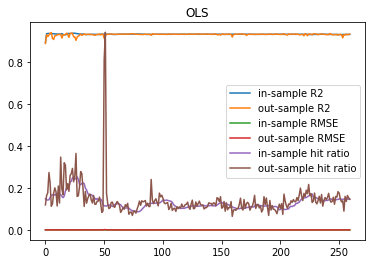

In [477]:
plt.plot(all_r2_in, label='in-sample R2')
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_in, label='in-sample RMSE')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.plot(all_hit_ratio_in, label='in-sample hit ratio')
plt.plot(all_hit_ratio_out, label='out-sample hit ratio')
plt.title('OLS')
plt.legend()
plt.show()

In [455]:
upper_quantile=0.7
lower_quantile=0.3
train_spread_upper = float(train['spread'].quantile(upper_quantile))
train_spread_lower = float(train['spread'].quantile(lower_quantile))
test_spread_upper = float(test['spread'].quantile(upper_quantile))
test_spread_lower = float(test['spread'].quantile(lower_quantile))

In [464]:
upper_case = train['spread'] >= train_spread_upper
lower_case = train['spread'] <= train_spread_lower
extreme_case = upper_case | lower_case

X_train = train[extreme_case][train[extreme_case].columns[0:-1]]
y_train = train[extreme_case]['delta_spread']

y_train = y_train.apply(lambda x: 1 if x > 0 else -1)

In [465]:
upper_case = test['spread'] >= test_spread_upper
lower_case = test['spread'] <= test_spread_lower
extreme_case = upper_case | lower_case

X_test = test[extreme_case][test[extreme_case].columns[0:-1]]
y_test = test[extreme_case]['delta_spread']

y_test = y_test.apply(lambda x: 1 if x > 0 else -1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

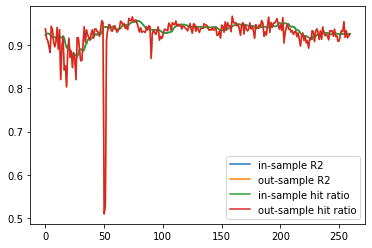

In [480]:
all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []
all_hit_ratio_in = []
all_hit_ratio_out = []

train_period = 10



for i in range(len(day_list) - train_period):
    
    train_start_time = feature.index >= pd.to_datetime(str(day_list[i]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    train_end_time = feature.index < pd.to_datetime(str(day_list[i + train_period - 1]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    train = feature[train_start_time & train_end_time]
    test_start_time = feature.index >= pd.to_datetime(str(day_list[i + train_period]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    test_end_time = feature.index < pd.to_datetime(str(day_list[i + train_period]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
    test = feature[test_start_time & test_end_time]

    X_train = train[train.columns[0:-1]]
    X_test = test[test.columns[0:-1]]
    y_train = train['delta_spread']
    y_test = test['delta_spread']

    y_train = y_train.apply(lambda x: 1 if x > 0 else -1)
    y_test = y_test.apply(lambda x: 1 if x > 0 else -1)
    

    model_logistic = LogisticRegression()
    model_logistic.fit(X_train, y_train)


    y_train_pred = model_logistic.predict(X_train)
    y_test_pred = model_logistic.predict(X_test)

    r2_in = model_logistic.score(X_train, y_train)
    r2_out = model_logistic.score(X_test, y_test)
    rmse_in = np.sqrt(np.mean((model_logistic.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((model_logistic.predict(X_test) - y_test) ** 2))

    # calculate hit ratio
    hit_ratio_in = 0
    hit_ratio_out = 0
    for i in range(len(y_train_pred)):
        if y_train_pred[i] * y_train[i] > 0:
            hit_ratio_in += 1

    for i in range(len(y_test_pred)):
        if y_test_pred[i] * y_test[i] > 0:
            hit_ratio_out += 1

    # add the result to the list
    all_r2_in.append(r2_in)
    all_r2_out.append(r2_out)
    all_rmse_in.append(rmse_in)
    all_rmse_out.append(rmse_out)
    all_hit_ratio_in.append(hit_ratio_in / len(y_train_pred))
    all_hit_ratio_out.append(hit_ratio_out / len(y_test_pred))


# plot the 4 lists in the same plot
plt.plot(all_r2_in, label='in-sample R2')
plt.plot(all_r2_out, label='out-sample R2')
# plt.plot(all_rmse_in, label='in-sample RMSE')
# plt.plot(all_rmse_out, label='out-sample RMSE')
plt.plot(all_hit_ratio_in, label='in-sample hit ratio')
plt.plot(all_hit_ratio_out, label='out-sample hit ratio')
plt.legend()
plt.show()

In [470]:
feature

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick,delta_spread
2022-04-27 09:00:15.039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,60.0,0.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.002041,-0.002049,1.0,-59.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,-0.000512,0.000515,0.0,0.0,0.0,0.00,0.000000,0.0
2022-04-27 09:00:15.179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,4.6,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:24:53.121,0.002471,0.002471,0.002131,0.002376,0.000070,0.000004,0.000066,58.876161,0.002402,0.002210,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,5.60,5.750000,0.0
2023-06-30 13:24:57.470,0.002471,0.002471,0.002162,0.002376,0.000081,0.000019,0.000062,58.876161,0.002425,0.002235,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,5.30,5.633333,0.0
2023-06-30 13:24:57.492,0.002471,0.002471,0.002193,0.002376,0.000088,0.000033,0.000055,58.876161,0.002440,0.002257,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.2,5.05,5.533333,0.0
2023-06-30 13:24:58.928,0.002471,0.002471,0.002224,0.002376,0.000093,0.000045,0.000048,58.876161,0.002450,0.002277,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.4,4.80,5.450000,0.0


In [473]:
train_period = 3
i = 0

In [474]:
train_start_time = feature.index >= pd.to_datetime(str(day_list[i]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
train_end_time = feature.index < pd.to_datetime(str(day_list[i + train_period - 1]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
train = feature[train_start_time & train_end_time]
test_start_time = feature.index >= pd.to_datetime(str(day_list[i + train_period]) + ' 09:00:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
test_end_time = feature.index < pd.to_datetime(str(day_list[i + train_period]) + ' 13:30:00.000', format = '%Y/%m/%d %H:%M:%S.%f')
test = feature[test_start_time & test_end_time]

model_ols = LinearRegression()
model_ols.fit(X_train, y_train)

y_train_pred = model_ols.predict(X_train)
y_test_pred = model_ols.predict(X_test)

r2_in = model_ols.score(X_train, y_train)
r2_out = model_ols.score(X_test, y_test)
rmse_in = np.sqrt(np.mean((model_ols.predict(X_train) - y_train) ** 2))
rmse_out = np.sqrt(np.mean((model_ols.predict(X_test) - y_test) ** 2))  

In [475]:
X_train

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,...,delta_pressure,delta_future_askPrice1,delta_future_bidPrice1,delta_stock_SP1,delta_stock_BP1,stock_trade_size,delta_stock_trade_size,vol_5_tick,vol_20_tick,vol_60_tick
2023-06-14 09:00:11.953,0.012482,0.006313,0.005156,0.004143,0.000842,0.000396,0.000446,97.914835,0.007341,0.005340,...,-0.000008,0.001791,-0.001800,-0.000004,0.000004,73.0,72.0,56.8,34.95,33.566667
2023-06-14 09:00:11.999,0.013072,0.007973,0.005571,0.004292,0.001350,0.000587,0.000763,98.062178,0.009251,0.006077,...,0.001180,0.000000,0.000000,0.000589,-0.000590,7.0,-66.0,46.6,35.65,33.700000
2023-06-14 09:00:14.434,0.010676,0.009154,0.005866,0.004400,0.001542,0.000778,0.000764,74.927835,0.009726,0.006515,...,0.001179,-0.002986,0.002998,0.000588,-0.000590,3.0,-4.0,36.0,35.75,33.800000
2023-06-14 09:00:14.470,0.011266,0.010453,0.006191,0.004518,0.001722,0.000967,0.000755,76.403652,0.010239,0.006967,...,0.001177,0.000000,0.000000,0.000587,-0.000590,17.0,14.0,25.4,35.85,33.900000
2023-06-14 09:00:14.484,0.011266,0.011752,0.006516,0.004637,0.001843,0.001142,0.000701,76.403652,0.010582,0.007377,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,-15.0,14.4,35.80,34.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 13:24:51.642,0.000000,0.000000,-0.000500,-0.000563,0.000125,0.000029,0.000096,55.423678,-0.000113,-0.000435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,24.70,32.366667
2023-06-29 13:24:53.150,0.000000,0.000000,-0.000438,-0.000542,0.000143,0.000052,0.000091,55.423678,-0.000076,-0.000394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.2,22.25,31.683333
2023-06-29 13:24:56.431,0.000000,0.000000,-0.000407,-0.000521,0.000156,0.000072,0.000083,55.423678,-0.000050,-0.000356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.4,19.40,30.983333
2023-06-29 13:24:56.473,0.000000,0.000000,-0.000407,-0.000511,0.000164,0.000091,0.000073,55.423678,-0.000034,-0.000322,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.8,19.25,30.266667
